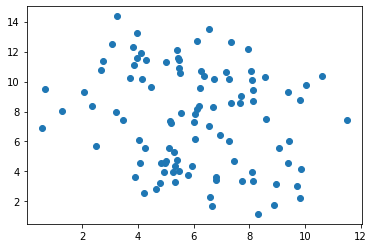

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data=pd.read_csv("apples.csv")
plt.scatter(data["height"], data["width"])
plt.show()



Xtrain=data.iloc[:,:-1].to_numpy();
Ytrain=data.iloc[:,-1].to_numpy();

In [5]:
def euclideana(x2, x1):
    return np.sqrt(np.sum(np.power(x2-x1, 2)))
# X son todos los puntos 
# Y son el color de los puntos 
# K son las clases 
# J son los vecinos cercanos
def clasificarEjemplo(X, Y, aClasificar, k):
    cercanos=[]
    for i in range(k):
        cercanos.append([np.inf, 0])
    for i in range(len(X)):
        distancia=euclideana(X[i], aClasificar)
        for j in range(k):
            if cercanos[j][0]>distancia:
                cercanos[j][0]=distancia
                cercanos[j][1]=Y[i]
                break

    clase=dict()
    clase[0]=0
    clase[1]=0
    for cercano in cercanos:
        clase[cercano[1]]+=1
    if clase[0]>clase[1]:
        return 0
    else:
        return 1




None


In [7]:
def clasificar(Xtrain, Ytrain, Xtest, k):
    resultado=[]
    for ejemplo in Xtest:
        resultado.append(clasificarEjemplo(Xtrain, Ytrain, ejemplo, k))
    return resultado

def accuracy(Yobtained, Yreal):
    correctos=0
    for i in range(len(Yobtained)):
        if Yobtained[i]==Yreal[i]:
            correctos+=1
    return correctos/len(Yobtained)



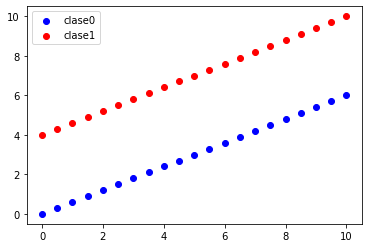

In [8]:
datos=pd.read_csv("lineas.csv")
clase1=datos.loc[datos["clase"]==1]
clase0=datos.loc[datos["clase"]==0]
plt.scatter(clase0.iloc[:,0], clase0.iloc[:,1], color="b", label="clase0")
plt.scatter(clase1.iloc[:,0], clase1.iloc[:,1], color="r", label="clase1")
plt.legend()
plt.show()

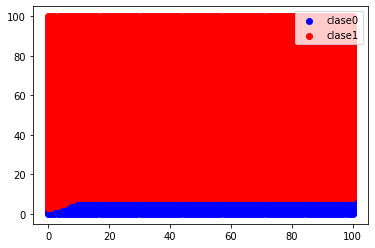

In [9]:
x=np.linspace(0,100,100)
y=np.linspace(0,100,100)
clases=dict()
clases[1]=[]
clases[0]=[]
Xtrain=datos.iloc[:, 0:-1].to_numpy();
Ytrain=datos.iloc[:, -1].to_numpy()
for i in range(len(x)):
    for j in range(len(y)):
        valor=[x[i],y[j]]
        clasificacion=clasificarEjemplo(Xtrain, Ytrain, valor, 1)
        clases[clasificacion].append(valor)
clases[0]=np.array(clases[0])
clases[1]=np.array(clases[1])
plt.scatter(clases[0][:,0], clases[0][:,1], color="b",label="clase0");
plt.scatter(clases[1][:,0], clases[1][:,1], color="r",label="clase1");
plt.legend()
plt.show()



In [10]:
test=pd.read_csv("applesTest.csv")
Xtest=test.iloc[:,:-1].to_numpy();
Ytest=test.iloc[:,-1].to_numpy();

accuracyClasificacion=accuracy(clasificar(Xtrain, Ytrain, Xtrain, 3), Ytrain)
accuracyTesting=accuracy(clasificar(Xtrain, Ytrain, Xtest, 3), Ytest)
print("Entrenamiento:", accuracyClasificacion, "Clasificacion:", accuracyTesting)

Entrenamiento: 0.9761904761904762 Clasificacion: 0.83


In [13]:
data=pd.read_csv("twitter.csv")
data.clase=pd.Categorical(data.clase)
data.clase=data.clase.cat.codes
idx=data.index.values
np.random.shuffle(idx)
folds=10
datosPorFold=len(idx)//folds
accuracyTraining=[]
accuracyTesting=[]
for f in range(0,folds):
    idxTest=idx[f*datosPorFold:(f+1)*datosPorFold]
    XTrain=data.iloc[~data.index.isin(idxTest),:-1].to_numpy()
    YTrain=data.iloc[~data.index.isin(idxTest),-1].to_numpy()
    XTest=data.iloc[idxTest, :-1].to_numpy();
    YTest=data.iloc[idxTest, -1].to_numpy();
    accuracyTraining.append(accuracy(clasificar(XTrain, YTrain, XTrain, 3), YTrain))
    accuracyTesting.append(accuracy(clasificar(XTrain, YTrain, XTest, 3), YTest))
print(accuracyTraining, accuracyTesting)

[0.8777573529411765, 0.8777573529411765, 0.8759191176470589, 0.8676470588235294, 0.8685661764705882, 0.8759191176470589, 0.8731617647058824, 0.8676470588235294, 0.8970588235294118, 0.9604779411764706] [0.9166666666666666, 0.8333333333333334, 0.875, 0.8416666666666667, 0.85, 0.9416666666666667, 0.875, 0.85, 0.8666666666666667, 0.8916666666666667]


In [12]:
print(np.average([0.8777573529411765, 0.8777573529411765, 0.8759191176470589, 0.8676470588235294, 0.8685661764705882, 0.8759191176470589, 0.8731617647058824, 0.8676470588235294, 0.8970588235294118, 0.9604779411764706]),np.average([0.8416666666666667, 0.8916666666666667, 0.8916666666666667, 0.8333333333333334, 0.8333333333333334, 0.9166666666666666, 0.8583333333333333, 0.8916666666666667, 0.8666666666666667, 0.8583333333333333]))

0.8841911764705882 0.8683333333333334
